<a href="https://colab.research.google.com/github/Mildredkulei7/KNN-Naives_bayes_Classifier/blob/main/Moringa_DSC_IP_W9_(kNN)_classifier_Mildred_Kulei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview: K-nearest neighbor (kNN) classifier - Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> We are required to implement a K-nearest neighbor (kNN) classifier in building a Model that will check if a passenger survived or did not survive titanic. Once we conduct the experiments, we will calculate the resulting metrics

### b) Defining the Metric for Success

* Achieve an accuracy of 85%
* Achieve F1 score of 85%

### c) Understanding the context 

Dataset Description:

PassengerId:	A unique ID to each Passenger; 1-891

Survived:	A boolean variable; 1 - Survived, 0 - Dead

Pclass:	Ticket Class; 1 - 1st, 2 - 2nd, 3 - 3rd class

Name:	Passenger Name

Sex:	Sex of Passenger

Age:	Age in Years

SibSp:	Number of Siblings / Spouses Aboard

Parch:	Number of parents / children aboard the titanic

Ticket:	Ticket number

Fare:	Passenger Fare

Cabin:	Cabin number

Embarked:	Port of Embarkation; C - Cherbourg, Q - Queenstown, S - Southampton


Some Notes Regarding Dataset

Pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

SibSp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

So we will create a model to check if the passenger survived titanic using the diferent variables.

### d) Recording the Experimental Design

* 1.Defining the question 
* 2.Importing the libraries 
* 3.Reading the data 
* 4.Data cleaning 
* 5.Exploratory data analysis(Biveriate summaries) 
* 6.Model creation 
* 7.Implementing solution 
* 8.Challenging solution

## 2. Reading the Data

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
%matplotlib inline

In [4]:
# Loading the Data from the source i.e. csv
# ---
dataset_train=pd.read_csv('/content/train (5).csv')
dataset_train.shape

(891, 12)

In [5]:
#test dataset
dataset_test=pd.read_csv('/content/test (1).csv')
dataset_test.shape

(418, 11)



## 3. Checking the Data

In [6]:
# Determining the no. of records in our dataset
#
print("Train dataset ", dataset_train.shape)
print("Test dataset ", dataset_test.shape)

Train dataset  (891, 12)
Test dataset  (418, 11)


In [7]:
# Previewing the top of our dataset
# Train dataset

dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#train dataset bottom

dataset_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
# Previewing the top of our test dataset
# 
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
#tail of test dataset
dataset_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [11]:
# Checking whether each column has an appropriate datatype
#
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 4. Tidying the Dataset

Because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

In [13]:
dataset_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

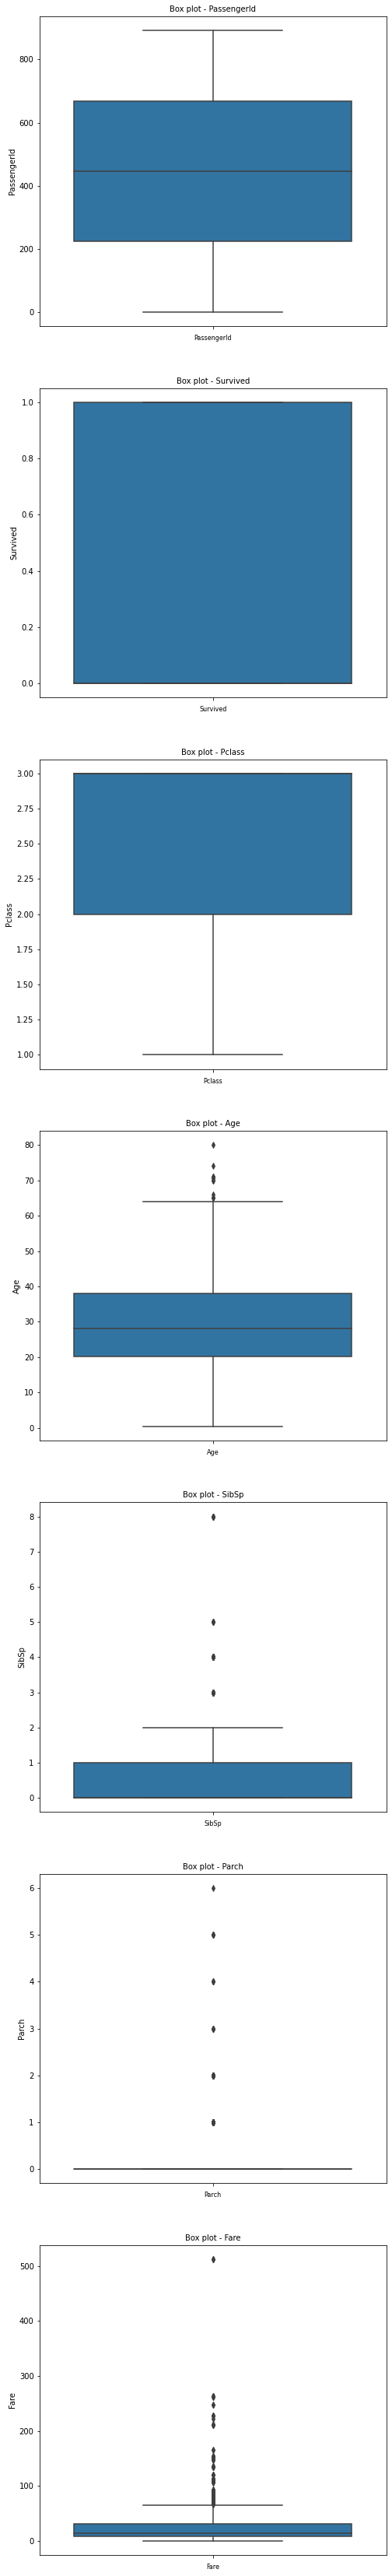

In [14]:
# Checking for Outliers
#
import seaborn as sns
import matplotlib.pyplot as plt

col_names =['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

fig, ax= plt.subplots(len(col_names), figsize=(8,60))

for i, col_val in enumerate(col_names):
  sns.boxplot(y= dataset_train[col_val], ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10 )
  ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [15]:
dataset_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Most passengers (> 75%) did not travel with parents or children.

We will not delete the outliers since they did not occur because of data entry errors, but because of the nature of the data.

In [16]:
# Identifying the Missing Data
#
dataset_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
total = dataset_train.isnull().sum().sort_values(ascending=False)
percent_1 = dataset_train.isnull().sum()/dataset_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


We will drop the Cabin column as it has alot of nulls which will not be a good excercise to impute them.

We will drop name and passenger ID since it willnot be useful in data modelling.

We will then fill the null values in age column with the mean of the age.

In [18]:
# Dealing with the Missing Data
#
dataset_train = dataset_train.drop(['Cabin', 'Name', 'PassengerId'], axis=1)
dataset_train.shape

(891, 9)

In [19]:
clean_dataset= dataset_train.copy(deep = True)
clean_dataset.shape

(891, 9)

In [20]:
clean_dataset['Age'].fillna(clean_dataset['Age'].mean(), inplace = True)

In [21]:
clean_dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

WE will then fill the two null values in emberk column with the most common one.

In [22]:
clean_dataset['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [23]:
common_value = 'S'
data = [clean_dataset]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [24]:
clean_dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## 5. Exploratory Analysis

0    549
1    342
Name: Survived, dtype: int64


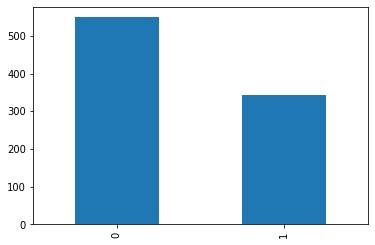

In [36]:
print(clean_dataset['Survived'].value_counts())
p=clean_dataset['Survived'].value_counts().plot(kind="bar")

In [37]:
342/(549+342)

0.3838383838383838

There were 38% survival rate

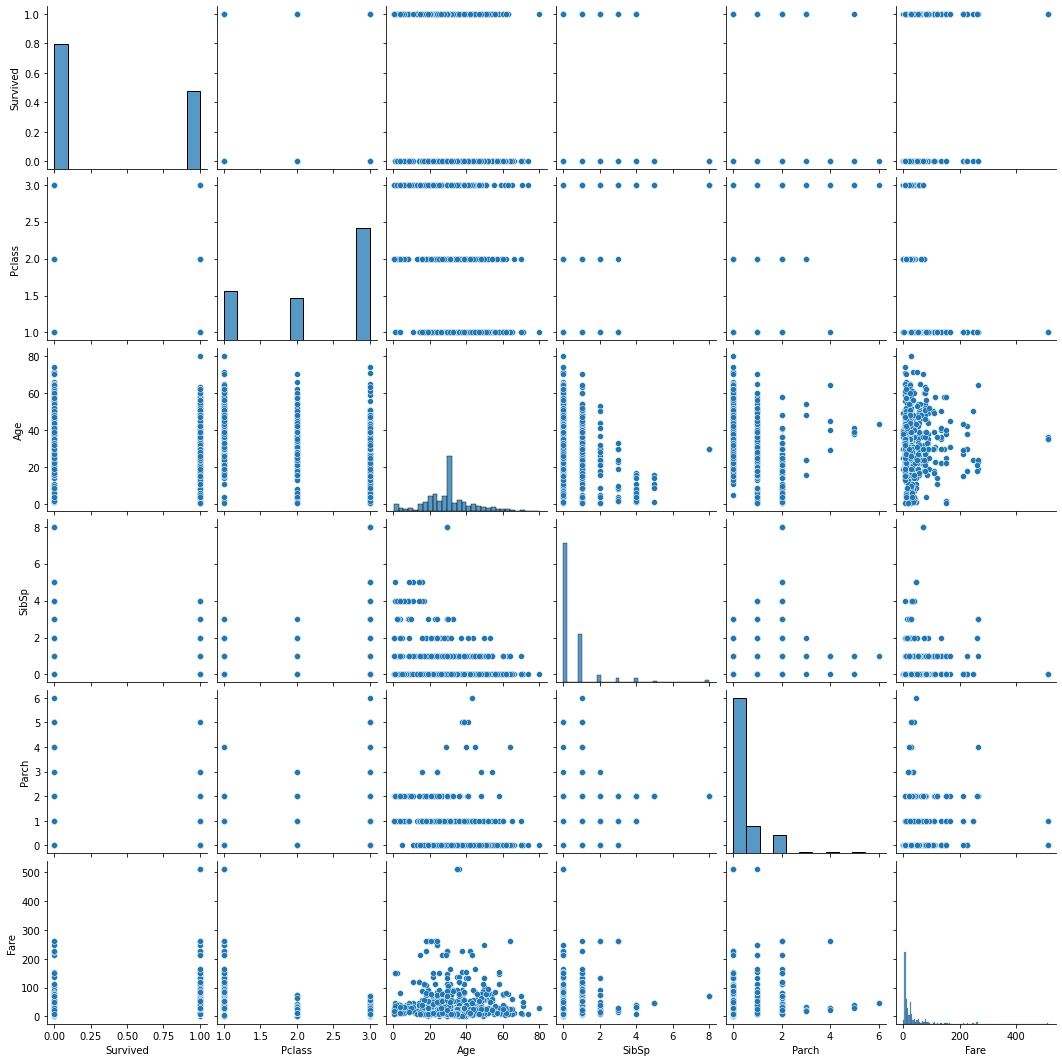

In [25]:
# Ploting the bivariate summaries and recording our observations
#
sns.pairplot(clean_dataset)
plt.show()
#There some relationship between numericals though week.

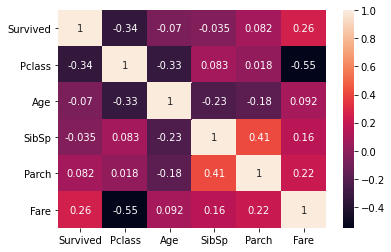

In [26]:
sns.heatmap(clean_dataset.corr(), annot=True)
plt.show()
#There were week relationship between the numericals

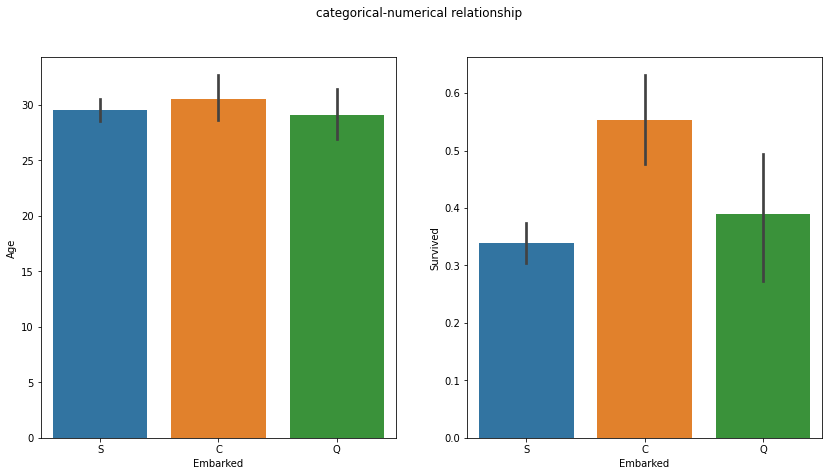

In [27]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(14, 7))
fig.suptitle('categorical-numerical relationship')
sns.barplot(clean_dataset['Embarked'], y= clean_dataset['Age'], ax=ax1)
sns.barplot(clean_dataset['Embarked'], y= clean_dataset['Survived'], ax=ax2)
plt.show()

Most people who embarked at "C" survived.

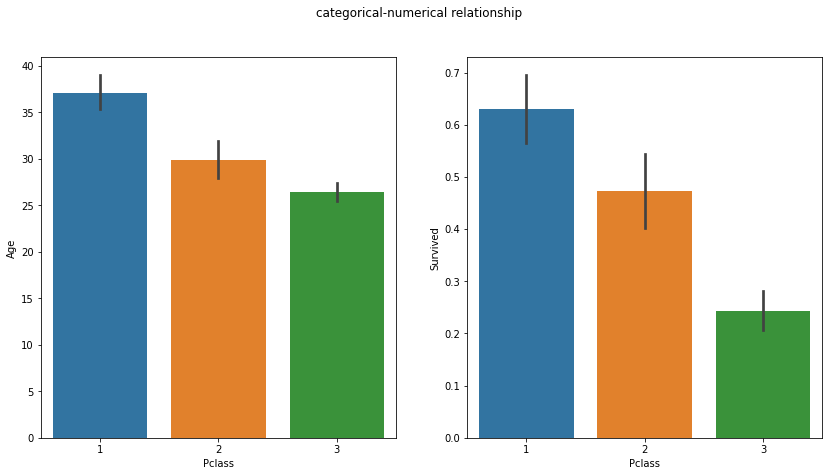

In [28]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(14, 7))
fig.suptitle('categorical-numerical relationship')
sns.barplot(clean_dataset['Pclass'], y= clean_dataset['Age'], ax=ax1)
sns.barplot(clean_dataset['Pclass'], y= clean_dataset['Survived'], ax=ax2)
plt.show();

Those who boarded Pclass 1 survived the most plus they had a high avarage age compared to the rest of Pclass.

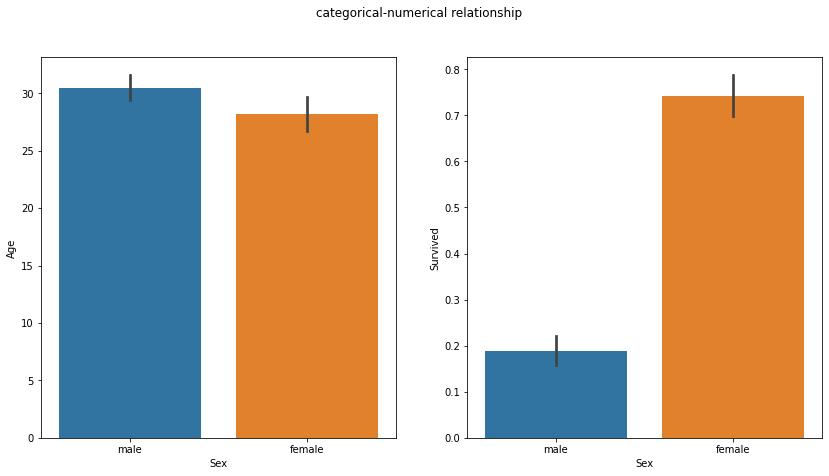

In [29]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(14, 7))
fig.suptitle('categorical-numerical relationship')
sns.barplot(clean_dataset['Sex'], y= clean_dataset['Age'], ax=ax1)
sns.barplot(clean_dataset['Sex'], y= clean_dataset['Survived'], ax=ax2)
plt.show();

Most females survived. Both sex had same avarage age

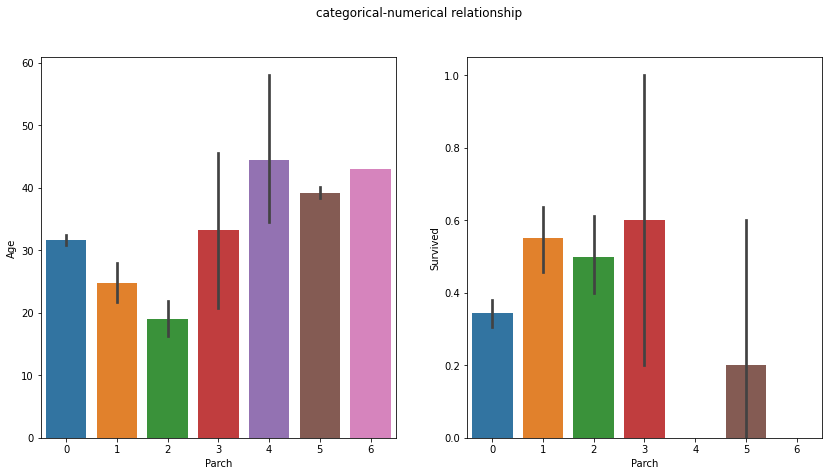

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(14, 7))
fig.suptitle('categorical-numerical relationship')
sns.barplot(clean_dataset['Parch'], y= clean_dataset['Age'], ax=ax1)
sns.barplot(clean_dataset['Parch'], y= clean_dataset['Survived'], ax=ax2)
plt.show();

Thos who had parent/child more than five did not survived.

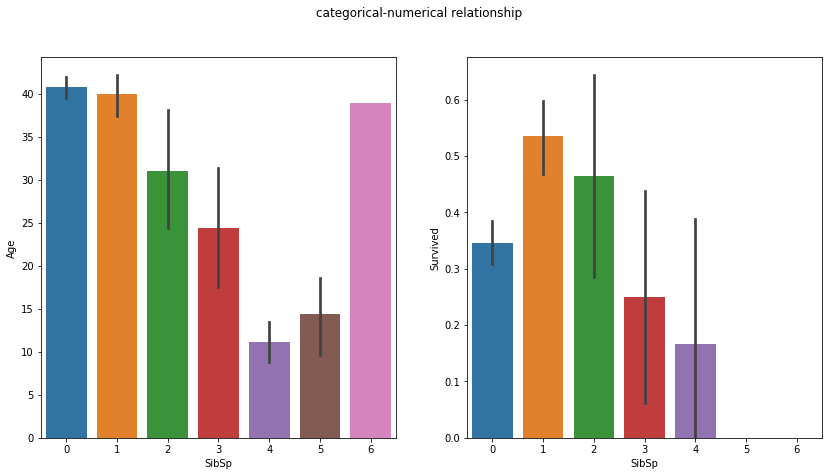

In [38]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(14, 7))
fig.suptitle('categorical-numerical relationship')
sns.barplot(clean_dataset['SibSp'], y= clean_dataset['Age'], ax=ax1)
sns.barplot(clean_dataset['SibSp'], y= clean_dataset['Survived'], ax=ax2)
plt.show();

Those who had one or two siblings or spouse survived the most.

In [31]:
# Data Reduction
#label encoding the dataset first
from sklearn.preprocessing import LabelEncoder

clean_dataset= clean_dataset.apply(LabelEncoder().fit_transform)
clean_dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,2,1,28,1,0,523,18,2
1,1,0,0,52,1,0,596,207,0
2,1,2,0,34,0,0,669,41,2
3,1,0,0,48,1,0,49,189,2
4,0,2,1,48,0,0,472,43,2
...,...,...,...,...,...,...,...,...,...
886,0,1,1,35,0,0,101,85,2
887,1,0,0,24,0,0,14,153,2
888,0,2,0,39,1,2,675,131,2
889,1,0,1,34,0,0,8,153,0


In [32]:
#spliting the dataset
X=clean_dataset.drop(['Survived'], axis=1)
y= clean_dataset['Survived']

#Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
#performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [34]:
lda= LDA()

lda_ = lda.fit(X, y)
lda_feat = lda_.transform(X)

#Display the coefficient of reducted columns
lda_.coef_

array([[-7.98311217e-01, -3.52165148e+00, -3.07089673e-02,
        -4.34826375e-01, -2.08519479e-01, -8.98476189e-04,
         6.28190000e-03, -2.43208186e-01]])

In [35]:
#create a dataframe so that we can extract the names of columns
f_df = pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
f_df.sort_values(0, ascending=False)

,0
Fare,0.006282
Ticket,-0.000898
Age,-0.030709
Parch,-0.208519
Embarked,-0.243208
SibSp,-0.434826
Pclass,-0.798311
Sex,-3.521651


## 6. Implementing the Solution

### Splitting the dataset to 80-20

In [79]:
# Implementing the Solution
# 
X=clean_dataset.drop(['Survived'], axis=1)
y= clean_dataset['Survived']

#Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
#feature scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
# Fitting our model 

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [82]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [83]:
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
y_pred = classifier.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.18435754189944134


In [84]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
780,1,1
837,0,0
215,1,1
833,0,0


In [85]:
#evaluating the Algorithim
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[96 14]
 [19 50]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



### Splitting the dataset to 70-30

In [47]:
# Implementing the Solution
# 
X=clean_dataset.drop(['Survived'], axis=1)
y= clean_dataset['Survived']

#Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
#feature scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Fitting our model 

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 1 0 0]


In [51]:
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
y_pred = classifier.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.20149253731343283


In [52]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
263,0,0
718,0,0
620,0,1
786,1,0


In [53]:
#evaluating the Algorithim
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[140  28]
 [ 26  74]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       168
           1       0.73      0.74      0.73       100

    accuracy                           0.80       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



### Splitting the dataset to 60-40

In [54]:
# Implementing the Solution
# 
X=clean_dataset.drop(['Survived'], axis=1)
y= clean_dataset['Survived']

#Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [55]:
#feature scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
# Fitting our model 

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1
 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1]


In [58]:
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
y_pred = classifier.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.21288515406162464


In [59]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
363,0,0
406,0,0
866,1,1
881,0,0


In [60]:
#evaluating the Algorithim
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[185  36]
 [ 40  96]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       221
           1       0.73      0.71      0.72       136

    accuracy                           0.79       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.79      0.79      0.79       357



When you split the data set further fom 80-20, train set and test set respectively, the Acuraci and F1 scored gradually decreases.

Therefore the best split size touse when creating the data modelling is 80-20.

### Model optimization

In [ ]:
# Implementing the Solution
# 
X=clean_dataset.drop(['Survived'], axis=1)
y= clean_dataset['Survived']

#Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

#List Hyperparameters to tune
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Making model
clf = GridSearchCV(classifier, hyperparameters, cv=10)
best_model = clf.fit(X_train,y_train)
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
#Predict testing set
y_pred = best_model.predict(X_test)
#Check performance using accuracy
print(accuracy_score(y_test, y_pred))
#Check performance using ROC

Best leaf_size: 1
Best p: 2
Best n_neighbors: 14
0.8179271708683473


In [65]:
#training using the best parameters found by gridsearch and prediction

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(leaf_size=1, p=2, n_neighbors=14)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [66]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1]


In [71]:
# Evaluating the Model
 
y_pred = classifier.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.18207282913165265


The MSE is close to zero which shows the model is good. Compairing it with score gotten from previous models which had higher MSE score, shows this model is the best.

In [68]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
363,0,0
406,0,0
866,1,1
881,0,0


In [69]:
#evaluating the Algorithim
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[198  23]
 [ 42  94]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       221
           1       0.80      0.69      0.74       136

    accuracy                           0.82       357
   macro avg       0.81      0.79      0.80       357
weighted avg       0.82      0.82      0.81       357



Model 1: using 80-20 split size
>F1 score= 85%, Accuracy score= 82%

Model 1 optimized.
>F1 score= 86%, Accuracy score= 82%

The F1 score increased after optimizing the model with the best parameters.

## 7. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






## 8. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?